In [ ]:
from google.colab import files
import os

# Define the path to the folder containing the images
folder_path = r"/content/C:\Users\Seven\Pictures\FaceRecognition/Sandra"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Upload the images to the folder
uploaded = files.upload()

# Loop through all the uploaded files
for filename in uploaded.keys():
    # Save the file to the folder
    with open(os.path.join(folder_path, filename), "wb") as f:
        f.write(uploaded[filename])

# Print the list of uploaded files
print("Uploaded files:")
for filename in os.listdir(folder_path):
    print(filename)

Saving Sandra1.jpg to Sandra1.jpg
Saving Sandra2.jpg to Sandra2.jpg
Saving Sandra3.jpg to Sandra3.jpg
Saving Sandra4.jpg to Sandra4.jpg
Uploaded files:
Sandra2.jpg
Sandra4.jpg
Sandra3.jpg
Sandra1.jpg


<ipython-input-7-844499659d0a>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  known_faces = np.array(known_faces)


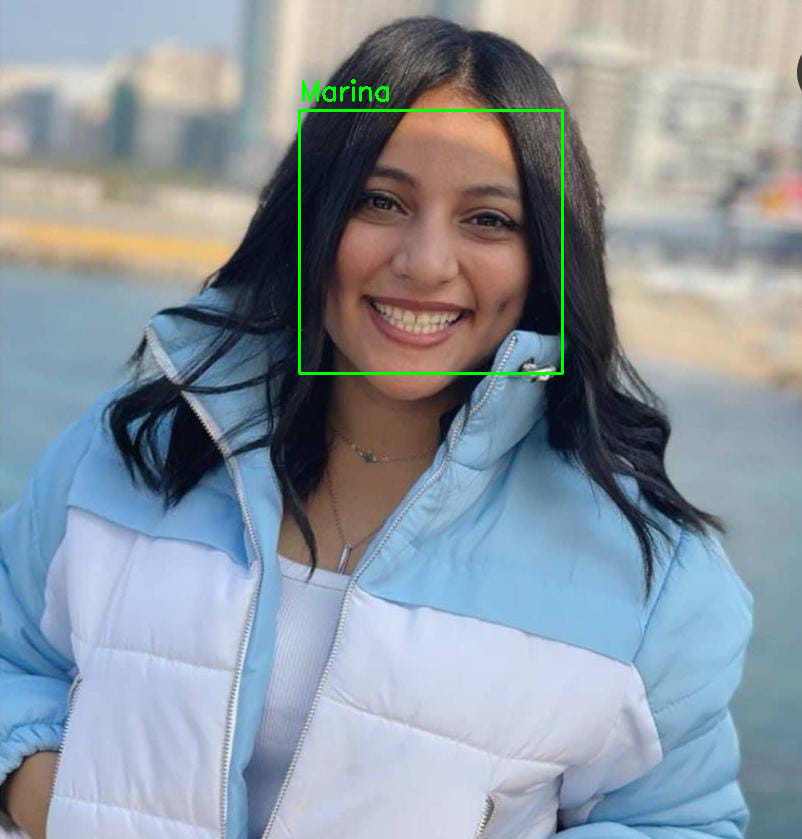

In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

# Define the path to the folder containing the subfolders of images of known faces
known_faces_folder_path = r"/content/C:\Users\Seven\Pictures\FaceRecognition"

# Define the path to the test image
test_image_path = r"/content/Marina_test.jpg"

# Check if the test image file exists
if not os.path.isfile(test_image_path):
    print(f"Error: Test image file not found at path '{test_image_path}'")
else:
    # Load the Haar Cascade Classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Initialize empty lists for storing the images and labels of known faces
    known_faces = []
    known_labels = []
    label_dict = {}

    # Loop through all the subfolders in the known faces folder
    for i, person_folder in enumerate(os.listdir(known_faces_folder_path)):
        # Check if the item is a folder
        if os.path.isdir(os.path.join(known_faces_folder_path, person_folder)):
            # Add the label to the label dictionary
            label_dict[i] = person_folder

            # Loop through all the image files in the folder
            for filename in os.listdir(os.path.join(known_faces_folder_path, person_folder)):
                # Check if the file is an image file
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    # Load the image and convert it to grayscale
                    image_path = os.path.join(known_faces_folder_path, person_folder, filename)
                    image = cv2.imread(image_path)
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    # Detect the faces in the image using the Haar Cascade Classifier
                    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

                    # Loop through all the detected faces and add them to the known_faces list
                    for (x, y, w, h) in faces:
                        face = gray_image[y:y+h, x:x+w]
                        known_faces.append(face)
                        known_labels.append(i)

    # Convert the known_faces and known_labels lists to numpy arrays
    known_faces = np.array(known_faces)
    known_labels = np.array(known_labels)

    # Load the test image and convert it to grayscale
    test_image = cv2.imread(test_image_path)
    if test_image is None:

        print(f"Error: Failed to load test image from '{test_image_path}'")
    else:
        gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

        # Detect the faces in the test image using the Haar Cascade Classifier
        faces = face_cascade.detectMultiScale(gray_test_image, scaleFactor=1.1, minNeighbors=5)

        # Loop through all the detected faces and recognize them
        for (x, y, w, h) in faces:
            face = gray_test_image[y:y+h, x:x+w]

            # Initialize empty lists for storing the labels and confidences of the recognized faces
            labels = []
            confidences = []

            # Loop through all the known faces and recognize the current face
            for i in range(len(known_faces)):
                recognizer = cv2.face.LBPHFaceRecognizer_create()
                recognizer.train([known_faces[i]], np.array([known_labels[i]]))
                label, confidence = recognizer.predict(face)

                # Add the label and confidence to the lists
                labels.append(label)
                confidences.append(confidence)

            # Find the label with the highest confidence
            max_confidence_index = np.argmin(confidences)
            label = labels[max_confidence_index]

            # Draw a rectangle aroundthe recognized face and display the label
            cv2.rectangle(test_image, (x, y),(x+w, y+h), (0, 255, 0), 2)
            cv2.putText(test_image, label_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display the test image with the recognized faces
        cv2_imshow(test_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()